# Motivational Example


These codes have been updated to work with Tensorflow 2.0. It will not work with previous versions.


reference: [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)

## Download Data

In [0]:
import numpy as np

try:
  # %tensorflow_version only existis in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf 
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


https://keras.io/datasets/

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

## NN Architecture

https://keras.io/getting-started/sequential-model-guide/

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28 * 28,)))

In [0]:
model.add(tf.keras.layers.Dense(units=10,
                       activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Data Prep

In [0]:
x_train_input = x_train.reshape((60000, 28 * 28))

In [0]:
x_train_input.dtype

dtype('uint8')

In [0]:
x_train_input.min()

0

In [0]:
x_train_input.max()

255

In [0]:
x_train_input = x_train_input.astype('float32') / 255

In [0]:
x_test_input = x_test.reshape((10000, 28 * 28))

In [0]:
x_test_input = x_test_input.astype('float32') / 255

## Loss Function and Optimiser

In [0]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train_input[:10000]
x_train_1 = x_train_input[10000:]

In [0]:
y_val = y_train[:10000]
y_train_1 = y_train[10000:]

In [0]:
history = model.fit(x_train_1,
                    y_train_1,
                    epochs=10,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 53us/sample - loss: 0.3401 - accuracy: 0.9011 - val_loss: 0.2387 - val_accuracy: 0.9283
Epoch 2/10
50000/50000 [==============================] - 1s 21us/sample - loss: 0.1455 - accuracy: 0.9572 - val_loss: 0.1388 - val_accuracy: 0.9585
Epoch 3/10
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0970 - accuracy: 0.9717 - val_loss: 0.1053 - val_accuracy: 0.9682
Epoch 4/10
50000/50000 [==============================] - 1s 20us/sample - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0893 - val_accuracy: 0.9735
Epoch 5/10
50000/50000 [==============================] - 1s 19us/sample - loss: 0.0533 - accuracy: 0.9842 - val_loss: 0.1012 - val_accuracy: 0.9706
Epoch 6/10
50000/50000 [==============================] - 1s 20us/sample - loss: 0.0408 - accuracy: 0.9884 - val_loss: 0.0762 - val_accuracy: 0.9767
Epoch 7/10
50000/50000 [==============================] 

test the model on test set

In [0]:
eval_loss, eval_acc = model.evaluate(x_test_input, 
                                     y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: {}'.format(eval_acc))

Test accuracy: 0.9794999957084656


In [0]:
history_dict = history.history

In [0]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualisation Performance

In [0]:
import matplotlib.pyplot as plt

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

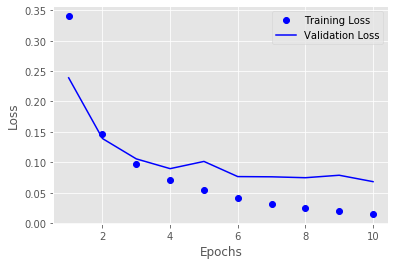

In [0]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo', 
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

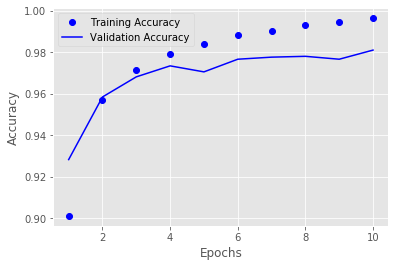

In [0]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', 
         label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

***